# 1) Introduction

The World Bank hosts a wide range of data on its website. One subset of this data, called the World Development Indicators, is a panel dataset containing a wide range of indicators for all the countries in the World starting in 1960 and ending in 2019 (as of August 2020). You can easily download the data from this [link](https://datacatalog.worldbank.org/dataset/world-development-indicators). To make the dataset small enough to upload to GitHub, I filtered out the data from before 2010. 

The dataset covers Health, Economic Development, Infrastructure, Climate Change and many other areas. The breadth of the dataset allows users to get a rich picture of the societal situation in each countries. The data is purely quantitative and so important aspects such as political system and culture are not included; at least not directly.

There are endless things that you can use this dataset for but one particularly powerful one is clustering. Unsupervised Learning techniques such as Hierarchical Clustering and K-Means Clustering allow us to group similar countries together. In this scenario, we can use these techniques to better understand the relationships between different countries in the world. This allows us to answer questions like: "Which countries are most similar to India?", "What is the most unique country in the World?", and "How much does Geography play in country similarity?". 

# 2) The Dataset

This project uses a csv file for the data: `WDIData.csv` (`df`) which contains the data used in the analysis. There are a number of missing values and unnecessary rows and we will work towards cleaning the data in the next section. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns

In [2]:
df = pd.read_csv('data_and_metadata/WDIData_2010_onwards.csv')

In [3]:
df.head(2)

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,82.368101,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,86.959991,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN


# 3) Cleaning the Data

There are two main issues with the dataset in its raw format: 1) there are a number of redundant rows and columns, 2) There are a number of missing values.

To keep track of the changes made when cleaning the dataset, I have created a function called `summary_stats()`. The function prints out some information about the current state of the dataset.

In [4]:
def summary_stats(df, wide=True):
    """Takes in a dataframe and prints the number of rows, columns and missing values.""" 
    print(f"""Number of rows{" (i.e. countries)" if wide else ""} in the dataframe: {df.shape[0]:,}
Number of columns{" (i.e. indicators)" if wide else ""} in the dataframe: {df.shape[1]}
Number of missing values in the dataframe: {df.isna().sum().sum():,}""")

## Reduntant Rows and Columns

The reduntant rows and columns stem from the fact that the aim of the project is to cluster **countries** in their **current** state. The World Bank dataset contains data from 1960 to 2019 and (as can be seen below the `df.head(2)` cell) contains country groupings such as "Arab World". 

Filtering out the country groupings is relatively straightforward. Online I found a list of the ISO3 Codes of all countries in the world and then only selected the rows which contained these ISO Codes in the `df['Country Code']` column.

In [5]:
summary_stats(df, False)

Number of rows in the dataframe: 377,784
Number of columns in the dataframe: 16
Number of missing values in the dataframe: 2,270,164


In [6]:
iso_countries = ['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'SXM',
                 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN',
                 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM',
                 'COD', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
                 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
                 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
                 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK',
                 'KOR', 'XKX', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG',
                 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR',
                 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'MNP', 'NOR', 'OMN',
                 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'PRI', 'QAT', 'ROU', 'RUS', 'RWA', 'WSM',
                 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'SSD', 'ESP',
                 'LKA', 'KNA', 'LCA', 'MAF', 'VCT', 'SDN', 'SUR', 'SWE', 'CHE', 'SYR', 'TJK', 'TZA', 'THA', 'TLS', 'TGO',
                 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV', 'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT',
                 'VEN', 'VNM', 'VIR', 'PSE', 'YEM', 'ZMB', 'ZWE']
df = df[df['Country Code'].isin(iso_countries)]
print("Number of countries:", df['Country Code'].nunique())

Number of countries: 217


In [7]:
summary_stats(df, False)

Number of rows in the dataframe: 310,527
Number of columns in the dataframe: 16
Number of missing values in the dataframe: 1,846,068


In [8]:
len(iso_countries)

217

In [9]:
df = df.iloc[:,:-1] # The last column is full of missing values and so we can drop it.

Selecting the latest year seems straightforward but there is an issue. It often takes the World Bank some time to collect the data and therefore the latest year often has many missing values. As can be seen below, over half of the values in the 2019 column are missing. The column with the least missing values is 2015; but that is quite a long time ago. I decided to strike a balance and select the 2017 for this column for this analysis.

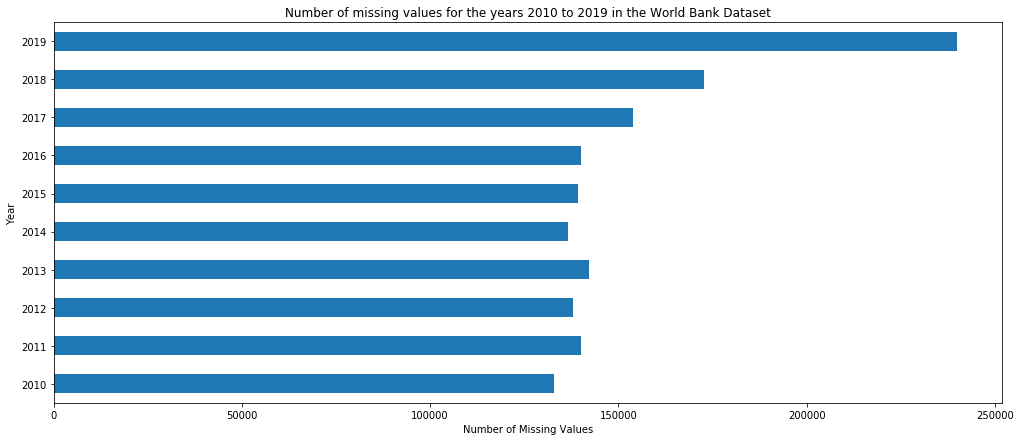

In [10]:
plt.figure(figsize=(17,7))
df.iloc[:, -10:].isna().sum().plot(kind='barh')
plt.title('Number of missing values for the years 2010 to 2019 in the World Bank Dataset')
plt.ylabel('Year')
plt.xlabel('Number of Missing Values');

In [11]:
df_2017 = df[['Country Name', 'Indicator Name', '2017']]

In [12]:
summary_stats(df_2017, False)

Number of rows in the dataframe: 310,527
Number of columns in the dataframe: 3
Number of missing values in the dataframe: 153,844


## Removing Missing Values

In [13]:
# changing the dataframe shape to make it easier to identify and remove missing values
df_wide = df_2017.pivot_table(values='2017', index='Country Name', columns='Indicator Name')

In [14]:
df_wide.head(2)

Indicator Name,ARI treatment (% of children under 5 taken to a health provider),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)","Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+)",...,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,97.7,97.091973,99.5,14.893312,7.160685,22.536495,18.016499,13.802503,8.887749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.3
Albania,NaN,100.0,100.000000,100.0,40.015171,38.102959,42.043503,42.513248,22.751028,27.497011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
summary_stats(df_wide)

Number of rows (i.e. countries) in the dataframe: 217
Number of columns (i.e. indicators) in the dataframe: 1213
Number of missing values in the dataframe: 106,538


Despite the work in the previous section there are still a lot of missing values. Typically, this is due to either the indicator being relatively abstract or the country in question has a lot of missing values. It is possible to just impute a value for the missing value by taking the mean of the indicator but this creates biases of its own. Two countries with many missing values may be clustered together when it is not necessarily the case that they are similar.

Below, I remove Indicators and Countries which have too many missing values to include in the analysis. I have tried to err on the side of removing Indicators as opposed to countries as the analysis is focused on countries and many indicators have considerable overlap to each other. Initially, there are 1431 indicators but by removing the indicators with more than 50 missing countries I reduce that down to 457.

In [16]:
df_wide = df_wide.dropna(axis=1, thresh=168) # selecting the indicators at least 168 countries

In [17]:
summary_stats(df_wide)

Number of rows (i.e. countries) in the dataframe: 217
Number of columns (i.e. indicators) in the dataframe: 457
Number of missing values in the dataframe: 12,776


The next step is removing the countries with too many missing indicators. I would like to keep as many countries as possible for the analysis so I only remove countries with 70 or more missing indicators. This allows me to keep 172 countries out of the original 217 countries in the dataset.

In [18]:
df_wide = df_wide.dropna(axis=0, thresh=380) # selecting the countries with at least 380 indicators

In [19]:
summary_stats(df_wide)

Number of rows (i.e. countries) in the dataframe: 172
Number of columns (i.e. indicators) in the dataframe: 457
Number of missing values in the dataframe: 1,795


Initially, there were over 100 000 missing values in the dataset. By removing, the columns and rows with too many missing values; there are now less than 2000 missing values. Despite this progress, we need the dataset to be completely free of missing values. For these values I will simply fill in the values with the mean of the column.

In [20]:
df_wide = df_wide.fillna(df_wide.mean())

In [21]:
summary_stats(df_wide)

Number of rows (i.e. countries) in the dataframe: 172
Number of columns (i.e. indicators) in the dataframe: 457
Number of missing values in the dataframe: 0


Finally, the data has been completely cleaned. It now contains 172 rows of countries and 457 columns indicators with no missing values.

# 4) Clustering

There are two main clustering algorithms in Unsupervised Machine Learning: Hierarchical Clustering and K-Means Clustering.I will be focusing on Hierarchical Clustering for this analysis.

## Initial Clustering

To ensure that certain indicators are not weighted more strongly than others; I scale the figures.

In [22]:
X = df_wide.values
country_names = list(df_wide.index)

In [23]:
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()
X_ss1 = ss1.fit_transform(X)

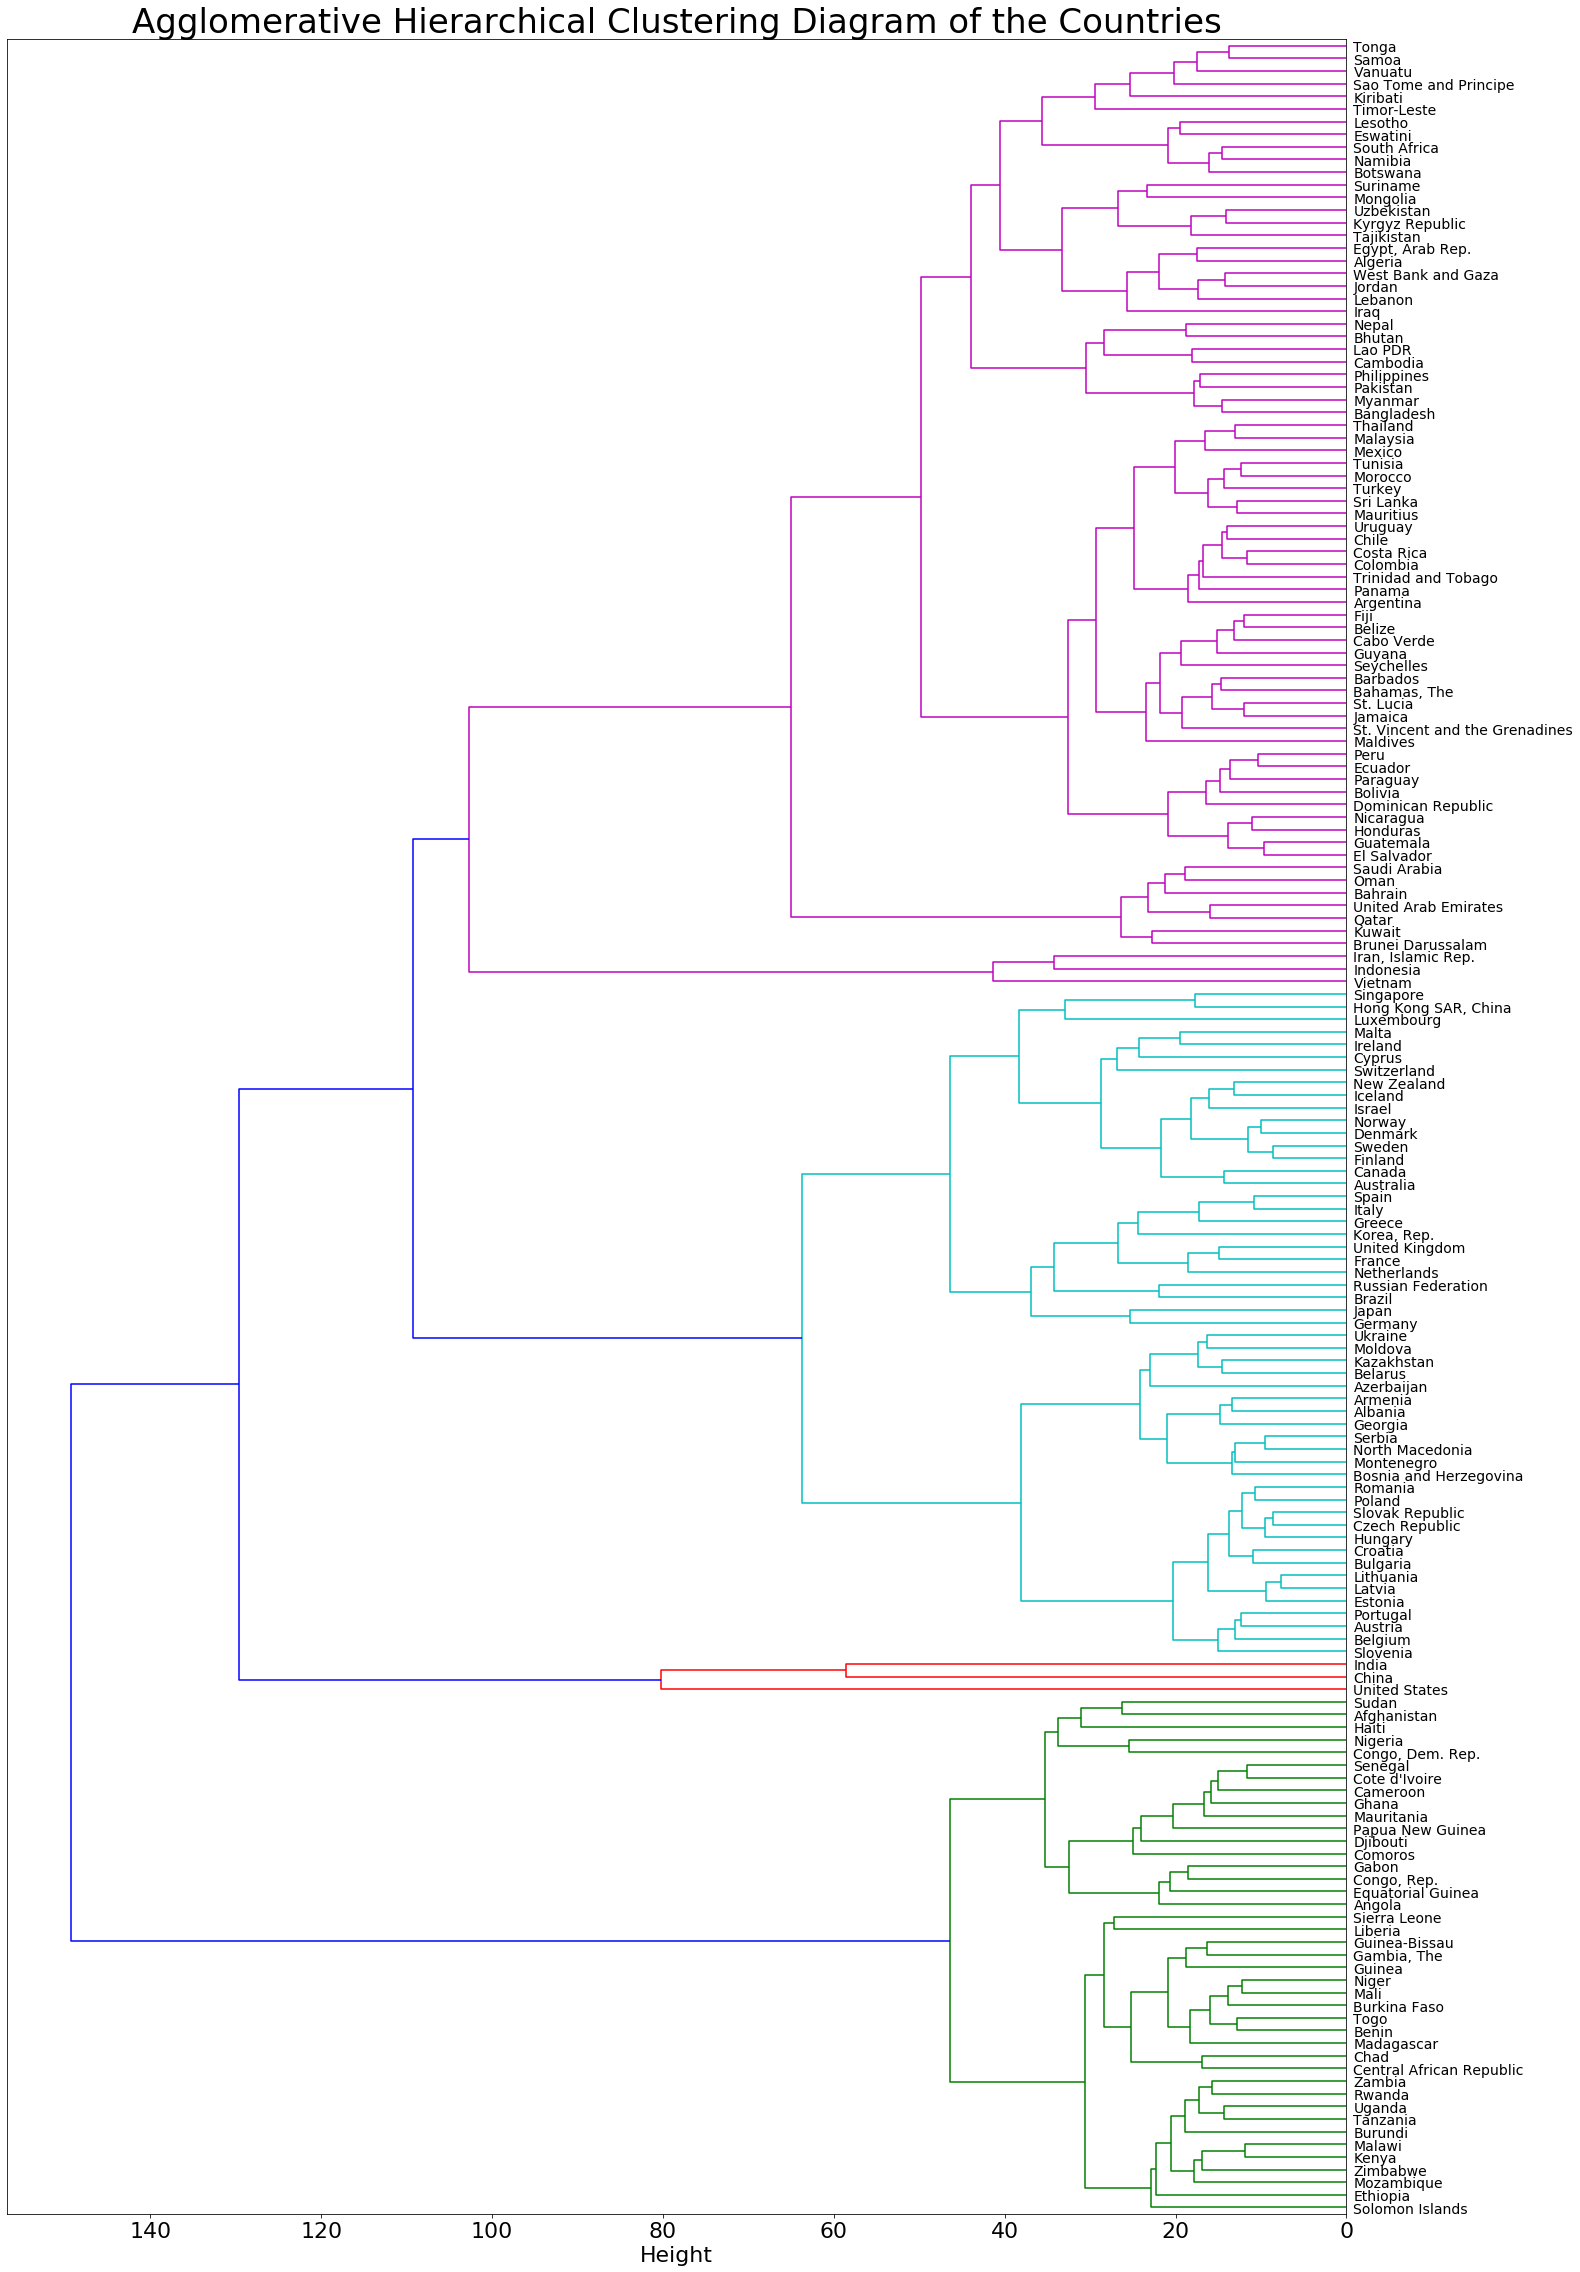

In [24]:
fig, ax = plt.subplots(figsize=(24,40))
sch.dendrogram(sch.linkage(X_ss1, method='ward'), labels=country_names, orientation='left', leaf_font_size=8)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.tick_params(axis='x', which='major', labelsize=22)
ax.set_title('Agglomerative Hierarchical Clustering Diagram of the Countries', size=34);
ax.set_xlabel('Height', size=22)
fig.savefig(r'images/County Clustering with Population Dependent Indicators.png');

HOW TO READ THE DENDROGRAM

The key thing to focus on is the "height" (although visually represented as width). This tells the order the clusters are joined. Countries that are more similar to each other have a joining line that is smaller in "height". Typically, dendrograms are shown top-down but I have presented this as left-to-right to make the labels easier to read.

Above is the first model. Although the font is difficult to read, you may notice some really weird and counterintuitive results. For example, the United States is most closely linked with India and China. For me, China and India are not the first countries that come to mind when I consider which countries are most similar to the United States.

Why do we get these results? There answer is rather simple. Many of the indicators are dependant on the population of the country. For example, the Germany and Luxembourg both have high **GDP per capita** but the **Total GDP** of Germany is more similar to that of India than it is to that of Luxembourg.

When I consider whether two countries are *similar*, I care less about absolute values (i.e. not adjusted for population) and more about *relative* values (i.e adjusted for population). Germany and Luxembourg to me would be similar if they had similar *relative* values despite having very different *absolute* values.

## Clustering adjusting for Population

To deal with this issue of absolute number dominating the analysis, I only look at the subset of indicators which contain values which are adjusted for population. This is done by selecting the indicators which contain "%", "per", "index", and "days" in their name. This reduces the dataset to 277 indicators.

In [25]:
summary_stats(df_wide)

Number of rows (i.e. countries) in the dataframe: 172
Number of columns (i.e. indicators) in the dataframe: 457
Number of missing values in the dataframe: 0


In [26]:
df_wide_non_pop = df_wide.filter(regex='|'.join(['%', ' per ', ' index ', 'days']) ) #selecting columns with population adjusted titles

In [27]:
summary_stats(df_wide_non_pop)

Number of rows (i.e. countries) in the dataframe: 172
Number of columns (i.e. indicators) in the dataframe: 277
Number of missing values in the dataframe: 0


In [28]:
print(df_wide_non_pop.columns.tolist()) # a list of all 277 indicators used in the final analysis

['Access to electricity (% of population)', 'Access to electricity, rural (% of rural population)', 'Access to electricity, urban (% of urban population)', 'Adjusted net national income per capita (current US$)', 'Adjusted savings: carbon dioxide damage (% of GNI)', 'Adjusted savings: consumption of fixed capital (% of GNI)', 'Adjusted savings: education expenditure (% of GNI)', 'Adjusted savings: energy depletion (% of GNI)', 'Adjusted savings: mineral depletion (% of GNI)', 'Adjusted savings: natural resources depletion (% of GNI)', 'Adjusted savings: net forest depletion (% of GNI)', 'Adjusted savings: particulate emission damage (% of GNI)', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Age dependency ratio (% of working-age population)', 'Age dependency ratio, old (% of working-age population)', 'Age dependency ratio, young (% of working-age population)', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Agriculture, forestry, and fishing, value ad

In [29]:
X = df_wide_non_pop.values
country_names = list(df_wide_non_pop.index)

In [30]:
ss2 = StandardScaler()
X_ss2 = ss2.fit_transform(X)

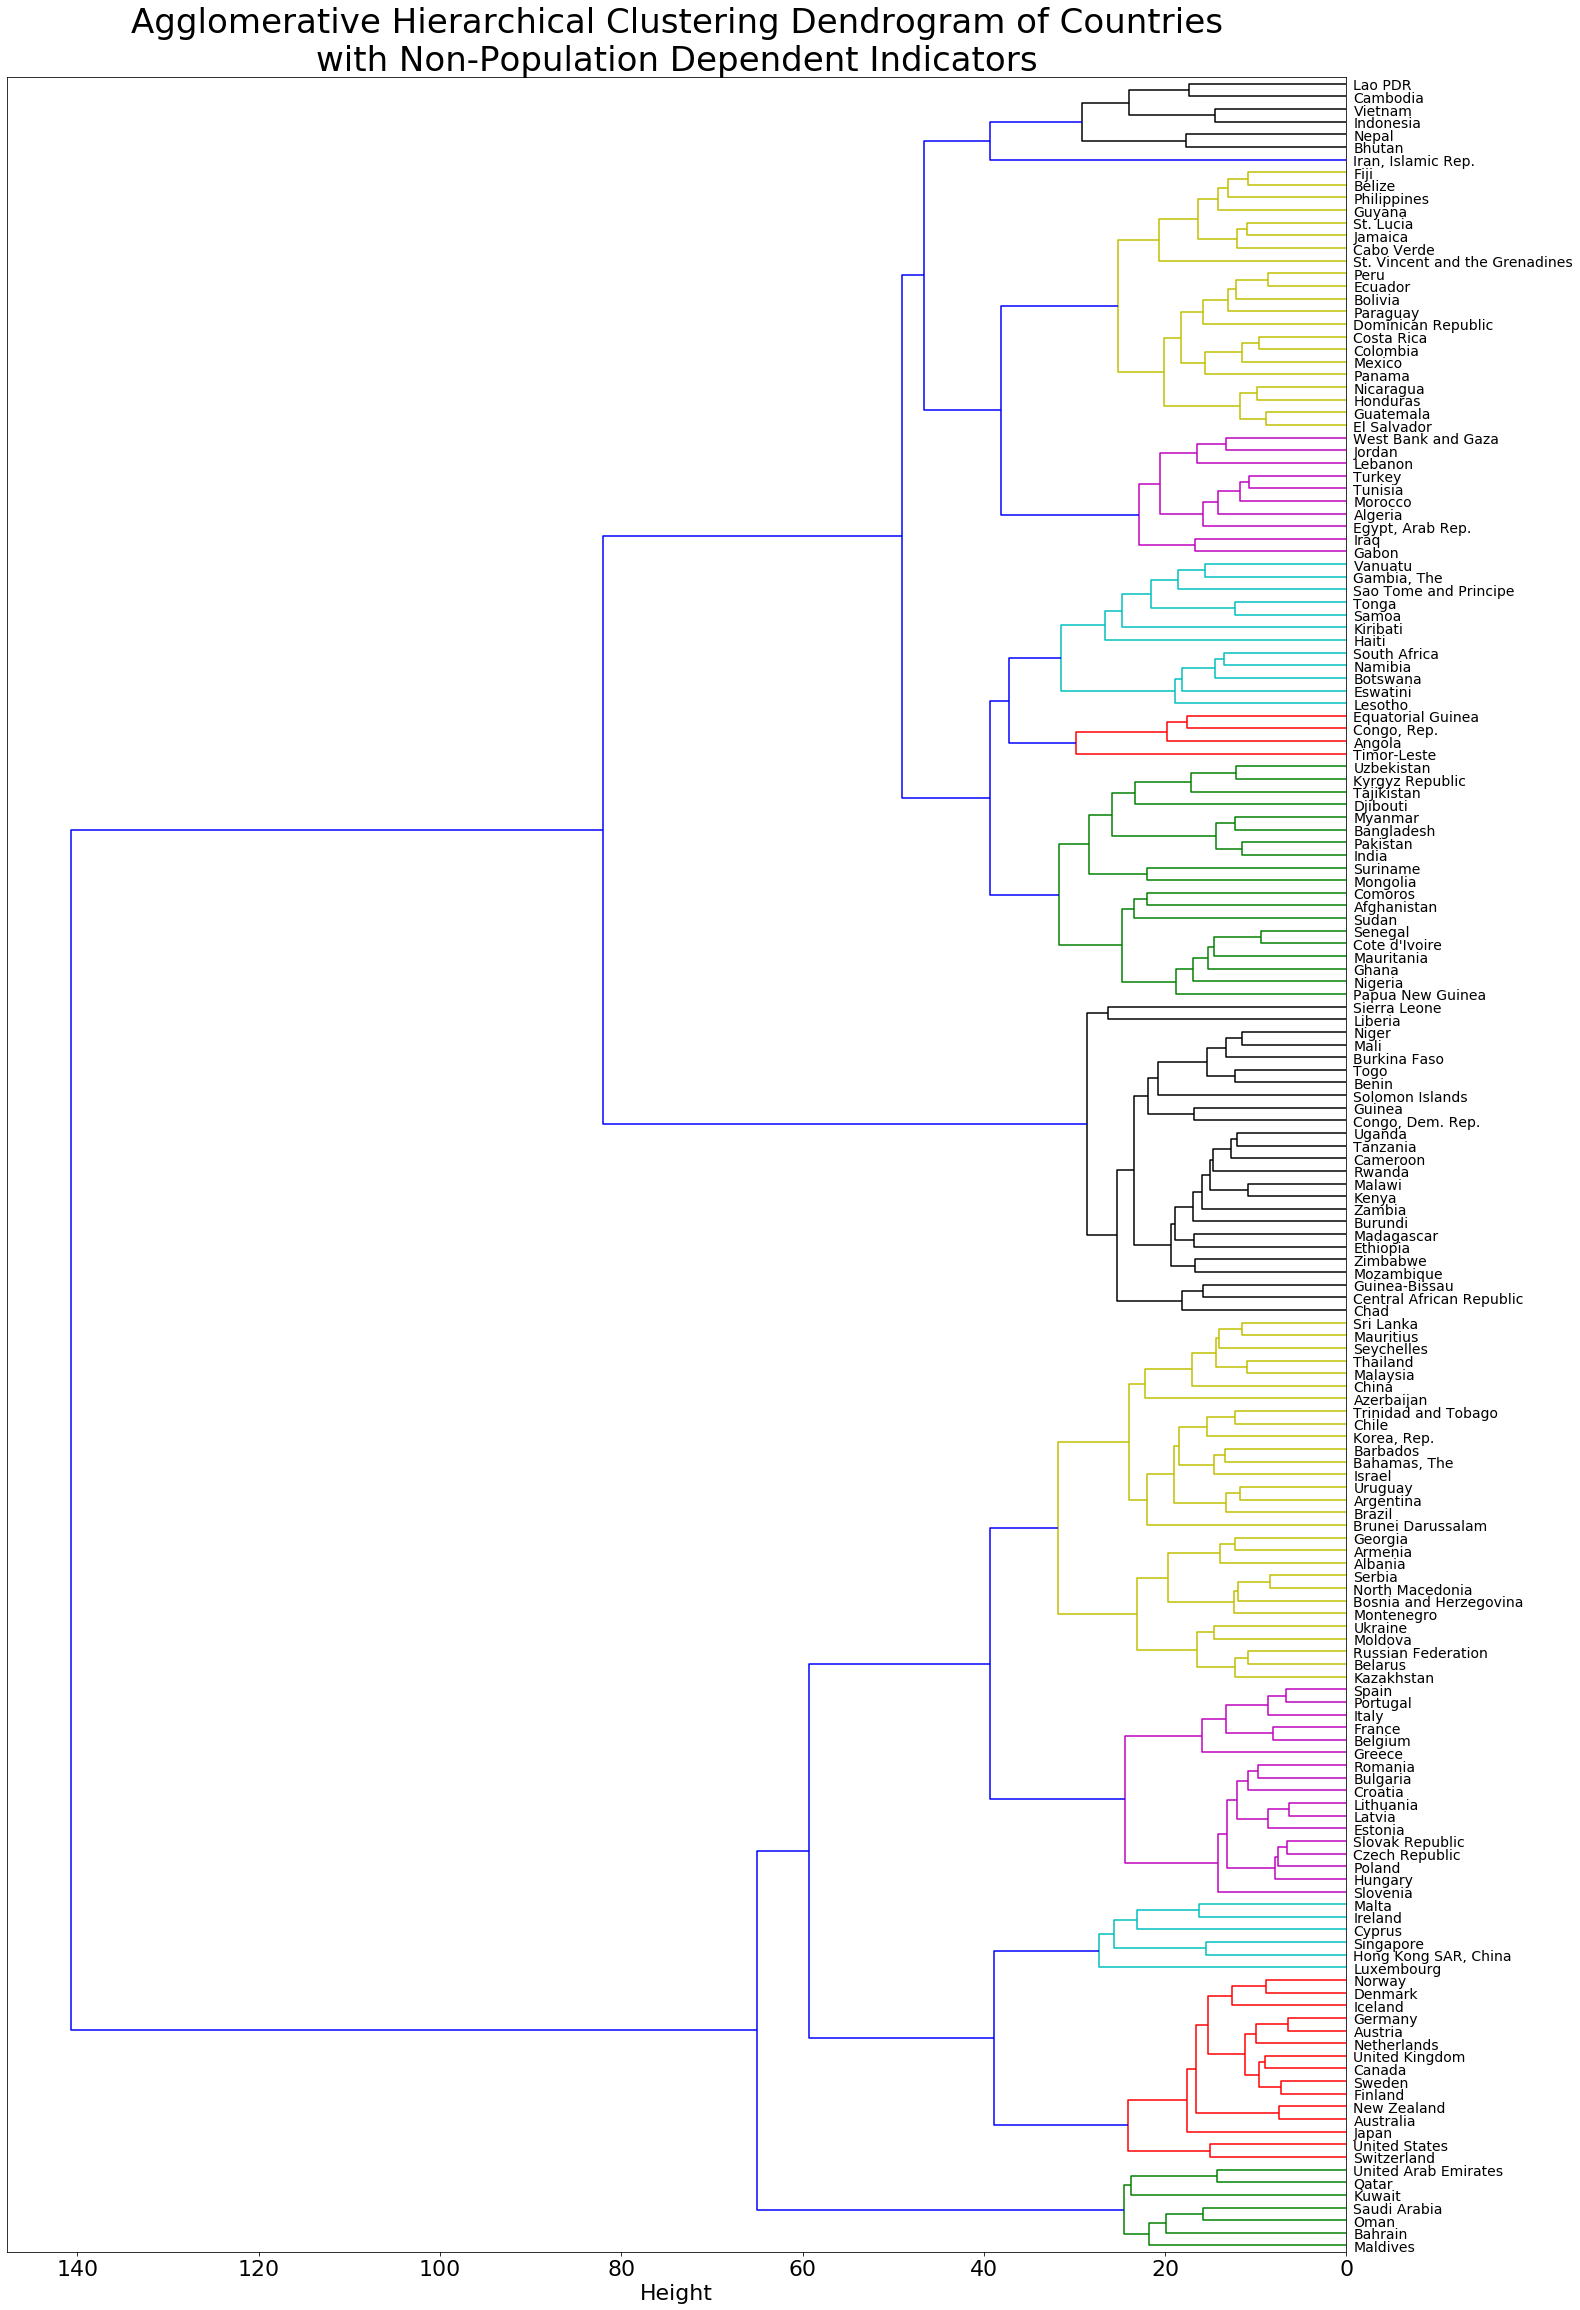

In [31]:
fig, ax = plt.subplots(figsize=(24,40))
sch.dendrogram(sch.linkage(X_ss2, method='ward'), labels=country_names, 
               orientation='left', leaf_font_size=8, color_threshold=37)
ax.tick_params(axis='y', which='major', labelsize=14)
ax.tick_params(axis='x', which='major', labelsize=22)
ax.set_title('Agglomerative Hierarchical Clustering Dendrogram of Countries\nwith Non-Population Dependent Indicators', size=34);
ax.set_xlabel('Height', size=22)
fig.savefig(r'images/County Clustering with Non-Population Dependent Indicators.png');

Eventually, we have our final results. To me these results make much more intuitive sense than the previous Dendrogram. For example, Australia and New Zealand, Tonga and Somoa, Germany and Austria, Sweden and Finland are all countries that intuitively feel to be closely related. This feel is reflected in the dendrogram. In both these cases the countries seem similar to me even though their sizes are quite different. There are some weirder results: Israel's closest relatives are Barbados and The Bahamas. This may be due to that fact that they all had a relatively large number of missing values and so were treated the same. 

# 5) Conclusions

Some interesting observations I found by looking at the chart are:

**1) Wealth matters.** The first major split divides the countries into a group containing roughly in half of the countries. The top group tends to contain very poor countries; many of which are located in Africa. The bottom group contains predominantly Upper-Middle Income and High Income countries. The World Bank data does tend to lean pretty heavily on economic indicators but it still is surprising how strongly wealth plays a role in the analysis.

**2) Geography matters.** The pair Latvia and Lithuania and the pair Germany and Austria are close competitors for the most closely-related pairs of countries in the world. Latvia and Lithuania and Germany and Austria all share borders. Countries that are closely related tend to share borders. One interesting exception is the United States whose closest relative is Switzerland.

**3) The most unique country in the world award is... Iran.** This is not a total surprise. Iran is home to one of the world's longest continuing civilisations and, at least until fairly recently, was under strong sanctions from many countries. Both of these factors would entrench some distinctive characteristics to it. Other highly distinctive countries are Timor-Leste, Cyprus, Azerbaijan, Luxembourg, Liberia, and Sierra Leone.

I hope you have found this analysis interesting. There are potentially endless ways you can look at this data and please feel free to download the code and create your own insights based on the data. 